In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing  Essential Python Modules required during the training
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [3]:
dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MS_Thesis/dataset/dataset.csv")
feature_names=dataset.columns

In [4]:
pd.set_option("display.max_columns",33)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9932 entries, 0 to 9931
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Domain                   9932 non-null   object 
 1   Have_HTTPS               9932 non-null   int64  
 2   Have_At                  9932 non-null   int64  
 3   URL_Length               9932 non-null   int64  
 4   URL_Depth                9932 non-null   int64  
 5   Redirection              9932 non-null   int64  
 6   http_https_Domain        9932 non-null   int64  
 7   Prefix_Suffix            9932 non-null   int64  
 8   SubDomainCount           9932 non-null   int64  
 9   DNS_Record               9932 non-null   int64  
 10  AgeOfDomain              9932 non-null   int64  
 11  Domain_End               9932 non-null   int64  
 12  iFrame                   9932 non-null   int64  
 13  Mouse_Over               9932 non-null   int64  
 14  Right_Click             

In [6]:
dataset['Label'].value_counts()#,gen_legi['Label'].value_counts(),gen_phish['Label'].value_counts()

0    4998
1    4934
Name: Label, dtype: int64

In [7]:
pd.set_option("display.max_columns",33)
dataset.describe()

,Have_HTTPS,Have_At,URL_Length,URL_Depth,Redirection,http_https_Domain,Prefix_Suffix,SubDomainCount,DNS_Record,AgeOfDomain,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Google_Index,Favicon,CopyRightSymbol,CopyRightYear,Domain_Around_CopyRight,LinkRatio,SSL_Domain_Name,Submit_Handler,FormMail,NonStandardPort,SubPagesCount,IndexPagesCount,MLSTagsRatio,Anchor_URL,RequestUrl,Empty_Link,visibilityMode,Label
count,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9.932000e+03,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000
mean,0.104913,0.009464,43.709726,0.297120,0.013794,0.000302,0.239629,0.010673,0.306786,0.487314,0.585582,0.196536,0.039871,0.040375,0.050946,0.025272,0.348973,0.737817,0.965667,0.982380,0.333401,0.865687,0.039871,0.039871,0.008659,47.966472,1.193655e+06,0.852008,0.451190,0.462172,0.087767,0.158377,0.496778
std,0.306457,0.096828,55.499778,0.912008,0.116640,0.017378,0.426879,0.102761,0.461183,0.499864,0.492646,0.397399,0.195666,0.196846,0.219899,0.156958,0.476669,0.439844,0.182093,0.131572,0.458660,0.341006,0.195666,0.195666,0.092654,226.372655,4.791386e+07,0.303886,0.413385,0.475500,0.245187,0.365112,0.500015
min,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.916667,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.016129,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.364362,0.184243,0.000000,0.000000,0.000000
75%,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,28.000000,0.000000e+00,1.000000,0.990000,1.000000,0.017699,0.000000,1.000000
max,1.000000,1.000000,822.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6370.000000,4.420000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
dataset

,Domain,Have_HTTPS,Have_At,URL_Length,URL_Depth,Redirection,http_https_Domain,Prefix_Suffix,SubDomainCount,DNS_Record,AgeOfDomain,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,...,CopyRightSymbol,CopyRightYear,Domain_Around_CopyRight,LinkRatio,SSL_Domain_Name,Submit_Handler,FormMail,NonStandardPort,SubPagesCount,IndexPagesCount,MLSTagsRatio,Anchor_URL,RequestUrl,Empty_Link,visibilityMode,Label
0,https://appimage.github.io,0,0,26,0,0,0,0,0,0,1,1,0,0,0,0,...,1,1,1,0.125000,1,0,0,0,18,1340,0.875,0.166667,0.764706,0.000000,0,0
1,https://twixlmedia.com,0,0,22,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0.090909,1,0,0,0,14,2150,0.000,0.363636,0.000000,0.000000,0,0
2,https://naesdezines.blogspot.com,0,0,32,0,0,0,0,0,1,1,1,1,0,0,0,...,0,1,1,0.005236,1,0,0,0,156,6,1.000,0.549738,0.722222,0.214660,1,0
3,https://castanimex.blogspot.com,0,0,31,0,0,0,0,0,1,1,1,1,0,0,0,...,1,1,1,0.014706,1,0,0,0,68,131,1.000,0.529412,0.945946,0.073529,1,0
4,https://talktoind.wordpress.com,0,0,31,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0.047170,1,0,0,0,41,128,1.000,0.160377,1.000000,0.028302,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,https://violation-management-a6bc6.web.app/,0,0,43,0,0,0,1,0,0,1,1,0,0,0,0,...,1,1,1,1.000000,1,0,0,0,0,0,1.000,0.000000,0.000000,0.000000,0,1
9928,https://salonandspaindia.com/.well-known/index...,0,0,51,2,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1.000000,1,0,0,0,0,0,1.000,0.000000,0.000000,0.000000,0,1
9929,http://zpr.io/qzsEq4PmzLex,1,0,26,1,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1.000000,1,0,0,0,0,0,1.000,0.000000,0.000000,0.000000,0,1
9930,https://ffnnbb_js_loader.rukkibospa5287.worker...,0,0,52,0,0,0,0,0,0,1,1,0,0,0,0,...,1,1,1,1.000000,1,0,0,0,0,0,1.000,0.000000,0.000000,0.000000,0,1


#Test RNN whole dataset

In [22]:
dataset['Label'].value_counts()#,gen_legi['Label'].value_counts(),gen_phish['Label'].value_counts()

0    4998
1    4934
Name: Label, dtype: int64

In [23]:
seed = 13

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#dataset
labels = dataset['Label']

# Tokenize the URLs and convert them to sequences
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(dataset['Domain'])
sequences = tokenizer.texts_to_sequences(dataset['Domain'])

# Pad sequences to ensure they have the same length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Create a simple RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_sequence_length))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed, stratify=y_train)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/10
224/224 [==============================] - 54s 236ms/step - loss: 0.2148 - accuracy: 0.9333 - val_loss: 0.1001 - val_accuracy: 0.9686
Epoch 2/10
224/224 [==============================] - 54s 243ms/step - loss: 0.0802 - accuracy: 0.9761 - val_loss: 0.0401 - val_accuracy: 0.9899
Epoch 3/10
224/224 [==============================] - 51s 229ms/step - loss: 0.0503 - accuracy: 0.9855 - val_loss: 0.0396 - val_accuracy: 0.9899
Epoch 4/10
224/224 [==============================] - 54s 240ms/step - loss: 0.0868 - accuracy: 0.9673 - val_loss: 0.0576 - val_accuracy: 0.9786
Epoch 5/10
224/224 [==============================] - 52s 233ms/step - loss: 0.0505 - accuracy: 0.9849 - val_loss: 0.0594 - val_accuracy: 0.9811
Epoch 6/10
224/224 [==============================] - 50s 223ms/step - loss: 0.0525 - accuracy: 0.9818 - val_loss: 0.3190 - val_accuracy: 0.8503
Epoch 6: early stopping
63/63 [==============================] - 2s 39ms/step - loss: 0.0609 - accuracy: 0.9829
Test Loss: 0.06093

--------------Validation-----------------
25/25 [==============================] - 1s 40ms/step
              precision    recall  f1-score   support

           0     0.9802    1.0000    0.9900       396
           1     1.0000    0.9799    0.9899       399

    accuracy                         0.9899       795
   macro avg     0.9901    0.9900    0.9899       795
weighted avg     0.9901    0.9899    0.9899       795

--------------Testing-----------------
63/63 [==============================] - 2s 38ms/step
              precision    recall  f1-score   support

           0     0.9700    0.9981    0.9839      1038
           1     0.9978    0.9663    0.9818       949

    accuracy                         0.9829      1987
   macro avg     0.9839    0.9822    0.9828      1987
weighted avg     0.9833    0.9829    0.9829      1987



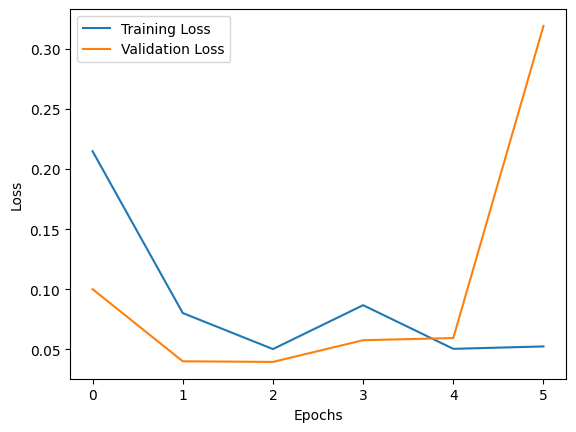

In [25]:
print('--------------Validation-----------------')
# Evaluate the model
y_pred_val = model.predict(X_val)
y_pred_val = np.round(y_pred_val).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_val, y_pred_val, digits = 4)
print(report)

print('--------------Testing-----------------')
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_test, y_pred, digits = 4)
print(report)

# Plot training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#LSTM

Epoch 1/10
224/224 [==============================] - 90s 386ms/step - loss: 0.3475 - accuracy: 0.8547 - val_loss: 0.1471 - val_accuracy: 0.9585
Epoch 2/10
224/224 [==============================] - 84s 374ms/step - loss: 0.1105 - accuracy: 0.9697 - val_loss: 0.0744 - val_accuracy: 0.9786
Epoch 3/10
224/224 [==============================] - 85s 380ms/step - loss: 0.0816 - accuracy: 0.9786 - val_loss: 0.0663 - val_accuracy: 0.9811
Epoch 4/10
224/224 [==============================] - 89s 396ms/step - loss: 0.0748 - accuracy: 0.9794 - val_loss: 0.0584 - val_accuracy: 0.9811
Epoch 5/10
224/224 [==============================] - 88s 393ms/step - loss: 0.0677 - accuracy: 0.9814 - val_loss: 0.0541 - val_accuracy: 0.9836
Epoch 6/10
224/224 [==============================] - 85s 379ms/step - loss: 0.0575 - accuracy: 0.9849 - val_loss: 0.0458 - val_accuracy: 0.9912
Epoch 7/10
224/224 [==============================] - 86s 382ms/step - loss: 0.0336 - accuracy: 0.9931 - val_loss: 0.0203 - val_ac

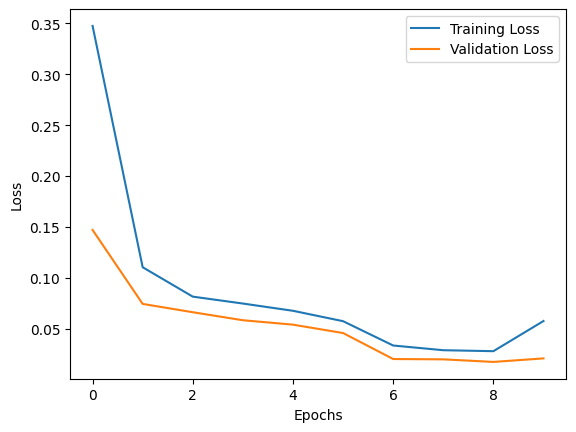

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#dataset
labels = dataset['Label']

# Tokenize the URLs and convert them to sequences
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(dataset['Domain'])
sequences = tokenizer.texts_to_sequences(dataset['Domain'])

# Pad sequences to ensure they have the same length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Create an LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_sequence_length))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed, stratify=y_train)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

print('--------------Validation-----------------')
# Evaluate the model
y_pred_val = model.predict(X_val)
y_pred_val = np.round(y_pred_val).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_val, y_pred_val, digits = 4)
print(report)

print('--------------Testing-----------------')
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_test, y_pred, digits = 4)
print(report)

# Plot training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Bi-LSTM

Epoch 1/10
224/224 [==============================] - 173s 749ms/step - loss: 0.3433 - accuracy: 0.8448 - val_loss: 0.1252 - val_accuracy: 0.9723
Epoch 2/10
224/224 [==============================] - 151s 673ms/step - loss: 0.1077 - accuracy: 0.9688 - val_loss: 0.0636 - val_accuracy: 0.9849
Epoch 3/10
224/224 [==============================] - 152s 680ms/step - loss: 0.0822 - accuracy: 0.9778 - val_loss: 0.0613 - val_accuracy: 0.9824
Epoch 4/10
224/224 [==============================] - 152s 679ms/step - loss: 0.0750 - accuracy: 0.9803 - val_loss: 0.0607 - val_accuracy: 0.9836
Epoch 5/10
224/224 [==============================] - 152s 678ms/step - loss: 0.0698 - accuracy: 0.9815 - val_loss: 0.0733 - val_accuracy: 0.9761
Epoch 6/10
224/224 [==============================] - 155s 691ms/step - loss: 0.0700 - accuracy: 0.9820 - val_loss: 0.0723 - val_accuracy: 0.9836
Epoch 7/10
224/224 [==============================] - 155s 692ms/step - loss: 0.0691 - accuracy: 0.9818 - val_loss: 0.0665 -

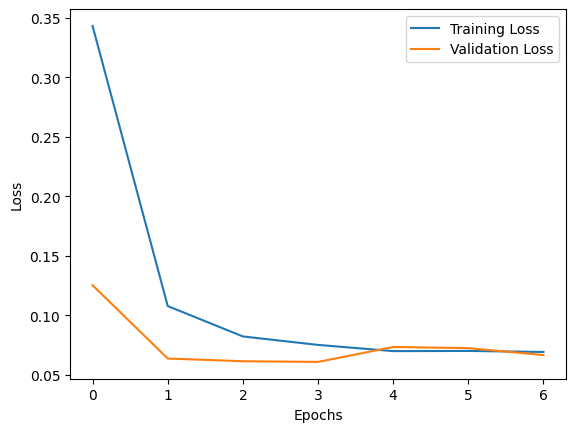

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#dataset
labels = dataset['Label']

# Tokenize the URLs and convert them to sequences
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(dataset['Domain'])
sequences = tokenizer.texts_to_sequences(dataset['Domain'])

# Pad sequences to ensure they have the same length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Create a Bi-LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed, stratify=y_train)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

print('--------------Validation-----------------')
# Evaluate the model
y_pred_val = model.predict(X_val)
y_pred_val = np.round(y_pred_val).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_val, y_pred_val, digits = 4)
print(report)

print('--------------Testing-----------------')
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_test, y_pred, digits = 4)
print(report)

# Plot training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#GRU

Epoch 1/10
224/224 [==============================] - 90s 390ms/step - loss: 0.2815 - accuracy: 0.8922 - val_loss: 0.0913 - val_accuracy: 0.9761
Epoch 2/10
224/224 [==============================] - 87s 390ms/step - loss: 0.0845 - accuracy: 0.9778 - val_loss: 0.0743 - val_accuracy: 0.9748
Epoch 3/10
224/224 [==============================] - 88s 392ms/step - loss: 0.0784 - accuracy: 0.9790 - val_loss: 0.0608 - val_accuracy: 0.9849
Epoch 4/10
224/224 [==============================] - 88s 392ms/step - loss: 0.0714 - accuracy: 0.9797 - val_loss: 0.0557 - val_accuracy: 0.9836
Epoch 5/10
224/224 [==============================] - 88s 393ms/step - loss: 0.0684 - accuracy: 0.9810 - val_loss: 0.0549 - val_accuracy: 0.9849
Epoch 6/10
224/224 [==============================] - 88s 394ms/step - loss: 0.0625 - accuracy: 0.9835 - val_loss: 0.0518 - val_accuracy: 0.9862
Epoch 7/10
224/224 [==============================] - 90s 402ms/step - loss: 0.0588 - accuracy: 0.9838 - val_loss: 0.0512 - val_ac

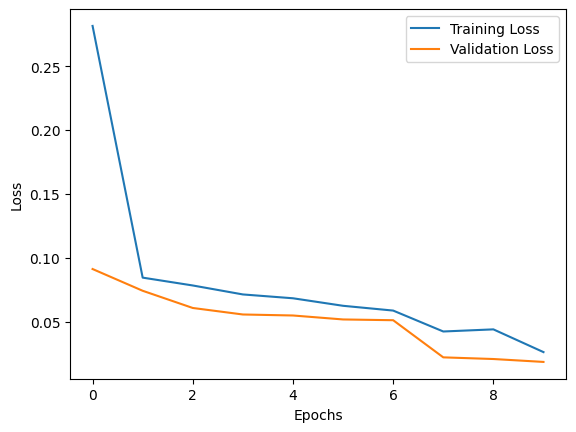

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#dataset
labels = dataset['Label']

# Tokenize the URLs and convert them to sequences
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(dataset['Domain'])
sequences = tokenizer.texts_to_sequences(dataset['Domain'])

# Pad sequences to ensure they have the same length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Create a GRU model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_sequence_length))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed, stratify=y_train)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

print('--------------Validation-----------------')
# Evaluate the model
y_pred_val = model.predict(X_val)
y_pred_val = np.round(y_pred_val).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_val, y_pred_val, digits = 4)
print(report)

print('--------------Testing-----------------')
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_test, y_pred, digits = 4)
print(report)

# Plot training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Bi-GRU

Epoch 1/10
224/224 [==============================] - 195s 843ms/step - loss: 0.3086 - accuracy: 0.8987 - val_loss: 0.1069 - val_accuracy: 0.9736
Epoch 2/10
224/224 [==============================] - 170s 759ms/step - loss: 0.1000 - accuracy: 0.9706 - val_loss: 0.0752 - val_accuracy: 0.9774
Epoch 3/10
224/224 [==============================] - 171s 763ms/step - loss: 0.0898 - accuracy: 0.9738 - val_loss: 0.0696 - val_accuracy: 0.9774
Epoch 4/10
224/224 [==============================] - 169s 755ms/step - loss: 0.0740 - accuracy: 0.9789 - val_loss: 0.0627 - val_accuracy: 0.9786
Epoch 5/10
224/224 [==============================] - 169s 755ms/step - loss: 0.0704 - accuracy: 0.9800 - val_loss: 0.0639 - val_accuracy: 0.9824
Epoch 6/10
224/224 [==============================] - 171s 764ms/step - loss: 0.0675 - accuracy: 0.9793 - val_loss: 0.0727 - val_accuracy: 0.9836
Epoch 7/10
224/224 [==============================] - 171s 762ms/step - loss: 0.0675 - accuracy: 0.9807 - val_loss: 0.0570 -

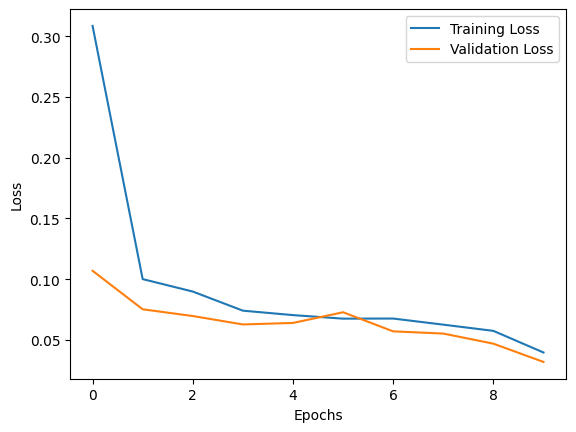

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#dataset
labels = dataset['Label']

# Tokenize the URLs and convert them to sequences
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(dataset['Domain'])
sequences = tokenizer.texts_to_sequences(dataset['Domain'])

# Pad sequences to ensure they have the same length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Create a Bidirectional GRU (Bi-GRU) model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_sequence_length))
model.add(Bidirectional(GRU(32)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed, stratify=y_train)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

print('--------------Validation-----------------')
# Evaluate the model
y_pred_val = model.predict(X_val)
y_pred_val = np.round(y_pred_val).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_val, y_pred_val, digits = 4)
print(report)

print('--------------Testing-----------------')
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_test, y_pred, digits = 4)
print(report)

# Plot training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#NN

Epoch 1/10
224/224 [==============================] - 14s 58ms/step - loss: 0.2602 - accuracy: 0.8962 - val_loss: 0.0905 - val_accuracy: 0.9673
Epoch 2/10
224/224 [==============================] - 12s 55ms/step - loss: 0.0893 - accuracy: 0.9722 - val_loss: 0.0607 - val_accuracy: 0.9736
Epoch 3/10
224/224 [==============================] - 11s 49ms/step - loss: 0.0708 - accuracy: 0.9783 - val_loss: 0.0493 - val_accuracy: 0.9811
Epoch 4/10
224/224 [==============================] - 11s 51ms/step - loss: 0.0638 - accuracy: 0.9800 - val_loss: 0.0473 - val_accuracy: 0.9849
Epoch 5/10
224/224 [==============================] - 12s 53ms/step - loss: 0.0523 - accuracy: 0.9846 - val_loss: 0.0432 - val_accuracy: 0.9887
Epoch 6/10
224/224 [==============================] - 12s 53ms/step - loss: 0.0476 - accuracy: 0.9870 - val_loss: 0.0451 - val_accuracy: 0.9849
Epoch 7/10
224/224 [==============================] - 12s 52ms/step - loss: 0.0406 - accuracy: 0.9888 - val_loss: 0.0455 - val_accuracy:

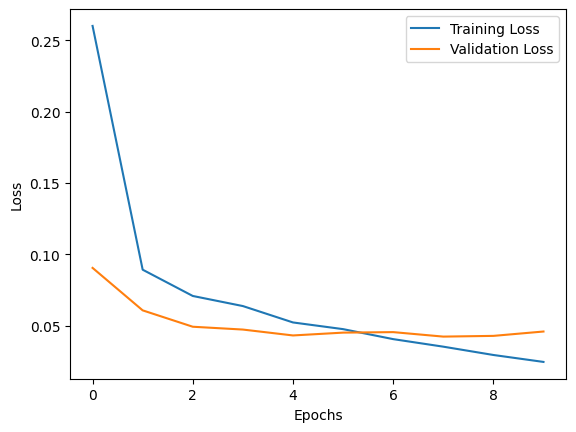

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#dataset
labels = dataset['Label']

# Tokenize the URLs and convert them to sequences
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(dataset['Domain'])
sequences = tokenizer.texts_to_sequences(dataset['Domain'])

# Pad sequences to ensure they have the same length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Build the neural network model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed, stratify=y_train)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

print('--------------Validation-----------------')
# Evaluate the model
y_pred_val = model.predict(X_val)
y_pred_val = np.round(y_pred_val).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_val, y_pred_val, digits = 4)
print(report)

print('--------------Testing-----------------')
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_test, y_pred, digits = 4)
print(report)

# Plot training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#CNN

Epoch 1/10
224/224 [==============================] - 37s 162ms/step - loss: 0.2600 - accuracy: 0.9278 - val_loss: 0.0399 - val_accuracy: 0.9925
Epoch 2/10
224/224 [==============================] - 34s 151ms/step - loss: 0.0326 - accuracy: 0.9934 - val_loss: 0.0201 - val_accuracy: 0.9962
Epoch 3/10
224/224 [==============================] - 38s 168ms/step - loss: 0.0269 - accuracy: 0.9948 - val_loss: 0.0163 - val_accuracy: 0.9962
Epoch 4/10
224/224 [==============================] - 34s 153ms/step - loss: 0.0231 - accuracy: 0.9950 - val_loss: 0.0155 - val_accuracy: 0.9962
Epoch 5/10
224/224 [==============================] - 36s 160ms/step - loss: 0.0219 - accuracy: 0.9952 - val_loss: 0.0124 - val_accuracy: 0.9962
Epoch 6/10
224/224 [==============================] - 34s 152ms/step - loss: 0.0182 - accuracy: 0.9959 - val_loss: 0.0117 - val_accuracy: 0.9962
Epoch 7/10
224/224 [==============================] - 34s 153ms/step - loss: 0.0152 - accuracy: 0.9962 - val_loss: 0.0121 - val_ac

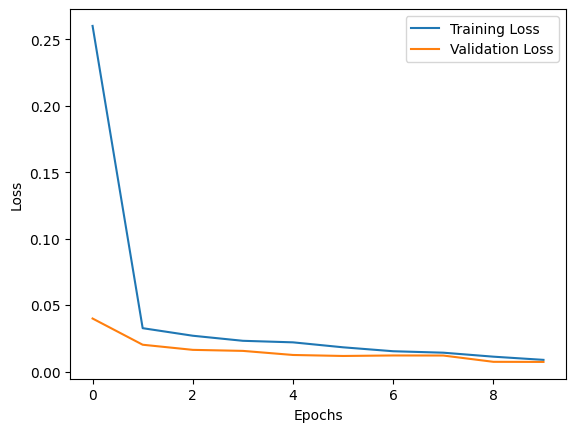

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#dataset
labels = dataset['Label']

# Tokenize the URLs and convert them to sequences
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(dataset['Domain'])
sequences = tokenizer.texts_to_sequences(dataset['Domain'])

# Pad sequences to ensure they have the same length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Build a 1D CNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed, stratify=y_train)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

print('--------------Validation-----------------')
# Evaluate the model
y_pred_val = model.predict(X_val)
y_pred_val = np.round(y_pred_val).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_val, y_pred_val, digits = 4)
print(report)

print('--------------Testing-----------------')
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_test, y_pred, digits = 4)
print(report)

# Plot training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()